In [ ]:
## Cat Horse classification by using AlexNet Network

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten,Activation, Dropout
from keras.layers import Dense
from  matplotlib import pyplot as plt
import numpy as np
from keras.layers.normalization import BatchNormalization

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(96, (11, 11), input_shape = (224, 224, 3),strides=(4,4), padding='valid', activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2), padding='valid'))

# Batch Normalisation before passing it to the next layer
classifier.add(BatchNormalization())

# Adding a second convolutional layer
classifier.add(Conv2D(256, kernel_size=(11,11),strides=(1,1), padding='valid',activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

# Batch Normalisation
classifier.add(BatchNormalization())

# 3rd Convolutional Layer
classifier.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
classifier.add(Activation('relu'))
# Batch Normalisation
classifier.add(BatchNormalization())

# 4th Convolutional Layer
classifier.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
classifier.add(Activation('relu'))
# Batch Normalisation
classifier.add(BatchNormalization())

# 5th Convolutional Layer
classifier.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
classifier.add(Activation('relu'))
# Pooling
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
classifier.add(BatchNormalization())

# Dense Layer passing it to Dense Layer - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 4096,input_shape=(224*224*3,), activation = 'relu'))
# Add Dropout to prevent overfitting
classifier.add(Dropout(0.4))
# Batch Normalisation
classifier.add(BatchNormalization())


classifier.add(Dense(4096, activation='relu'))
# Add Dropout
classifier.add(Dropout(0.4))
# Batch Normalisation
classifier.add(BatchNormalization())


# 3rd Dense Layer
classifier.add(Dense(1000))
classifier.add(Activation('relu'))
# Add Dropout
classifier.add(Dropout(0.4))
# Batch Normalisation
classifier.add(BatchNormalization())


classifier.add(Dense(units = 2, activation = 'softmax'))


classifier.summary()


# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'/content/drive/My Drive/biclass/2class',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'/content/drive/My Drive/biclass/2class',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

model = classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 20,
                         validation_data = test_set,
                         verbose=1,
                         validation_steps = 75)

classifier.save("/content/drive/My Drive/biclass/multi_model_lenet_2.h5")
print("Saved model to disk")

In [25]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
from  matplotlib import pyplot as plt
import pandas as pd
import os
listing =[]
classes = ['cat','horse']
model = load_model('/content/drive/My Drive/biclass/multi_model_lenet_2.h5')
for cls in classes:
  for count, filename in enumerate(os.listdir("/content/drive/My Drive/biclass/2class/"+cls)):
    test_image = image.load_img(r'/content/drive/My Drive/biclass/2class/'+cls+'/'+filename, target_size = (224,224))
    #plt.imshow(test_image,cmap='gray')
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict_proba(test_image)
    result
    rslt = np.where(result == np.amax(result))
    index_values =  list(zip(rslt[0],rslt[1]))
    #print('Coordinates are ',rslt[1][0])
    if rslt[1][0] == 0 :
      prediction = 'cat'
      #print(prediction)
    elif rslt[1][0] == 1 :
      prediction = 'horse'
      #print(prediction)
    else :
      print('None')
    listing.append((cls,prediction))
  
x=pd.DataFrame(listing, columns=('Actual', 'Predicted'))
  

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 384)        

[[180  25]
 [ 95 108]]


Text(33.0, 0.5, 'Predicted')

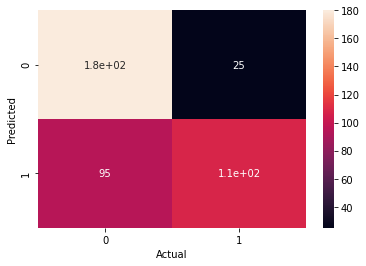

In [34]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
le= preprocessing.LabelEncoder()

x['Actual']=le.fit_transform(x['Actual'])
x['Predicted']=le.fit_transform(x['Predicted'])

results = confusion_matrix(x['Actual'], x['Predicted'])
print(results)

plt.figure()
sns.heatmap(results, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [33]:
from sklearn.metrics import classification_report
print(classification_report(x['Actual'],x['Predicted']))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       205
           1       0.81      0.53      0.64       203

    accuracy                           0.71       408
   macro avg       0.73      0.71      0.70       408
weighted avg       0.73      0.71      0.70       408

